In [1]:
import cv2

from secPysift import *
import numpy as np
import tenseal as ts

IMG_NAME = 'cat'
img1 = cv2.imread('cat.png', 0)
# resize to 20 x 20
img1 = cv2.resize(img1, (20, 20))

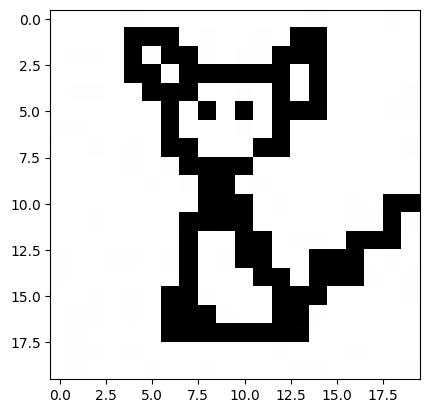

<Figure size 1000x1000 with 0 Axes>

In [2]:
from matplotlib import pyplot as plt
def plot_image(img, figure_size=(10, 10)):
    # plt.imshow(img, cmap='gray')
    plt.figure(figsize=figure_size)
    plt.show()

plot_image(img1)

In [3]:
## Encryption Parameters

# controls precision of the fractional part
bits_scale = 26

# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)

# set the scale
context.global_scale = pow(2, bits_scale)

# galois keys are required to do ciphertext rotations
context.generate_galois_keys()

secret_key = context.secret_key()
context.make_context_public()

def enc(image):
    enc_img = [[ts.ckks_vector(context=context, vector=[col]) for col in row] for row in image]
    enc_img = np.array(enc_img, dtype=ts.CKKSVector)

    return enc_img

enc_img = enc(img1)

In [39]:
base_image = secGenerateBaseImage(enc_img, 1.6, 0.5, kernel_size=5)

Resize done
kernel : [[0.00851737 0.02227902 0.0306968  0.02227902 0.00851737]
 [0.02227902 0.05827563 0.08029415 0.05827563 0.02227902]
 [0.0306968  0.08029415 0.11063203 0.08029415 0.0306968 ]
 [0.02227902 0.05827563 0.08029415 0.05827563 0.02227902]
 [0.00851737 0.02227902 0.0306968  0.02227902 0.00851737]]


In [40]:
def dec(image):
    return np.array([[x.decrypt(secret_key) for x in row] for row in image])

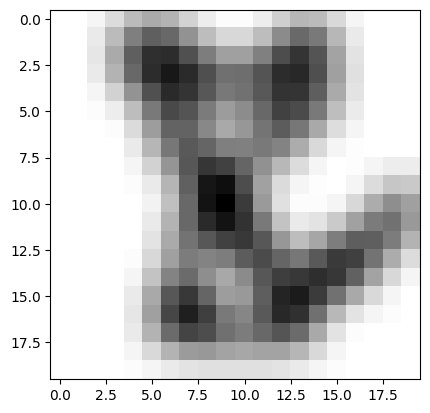

<Figure size 1000x1000 with 0 Axes>

In [41]:
plot_image(dec(base_image))

In [42]:
num_octaves = secComputeNumberOfOctaves(img1.shape)
gaussian_kernels = secGenerateGaussianKernels(1.6, 3)

In [43]:
gaussian_images = secGenerateGaussianImages(base_image, num_octaves, gaussian_kernels)

  0%|          | 0/3 [00:00<?, ?it/s]

kernel : [[3.58493231e-06 2.07916631e-05 8.15926833e-05 2.16654104e-04
  3.89256922e-04 4.73216071e-04 3.89256922e-04 2.16654104e-04
  8.15926833e-05 2.07916631e-05]
 [2.07916631e-05 1.20586169e-04 4.73216071e-04 1.25653674e-03
  2.25758761e-03 2.74452856e-03 2.25758761e-03 1.25653674e-03
  4.73216071e-04 1.20586169e-04]
 [8.15926833e-05 4.73216071e-04 1.85704091e-03 4.93102469e-03
  8.85944670e-03 1.07703481e-02 8.85944670e-03 4.93102469e-03
  1.85704091e-03 4.73216071e-04]
 [2.16654104e-04 1.25653674e-03 4.93102469e-03 1.30934135e-02
  2.35246031e-02 2.85986443e-02 2.35246031e-02 1.30934135e-02
  4.93102469e-03 1.25653674e-03]
 [3.89256922e-04 2.25758761e-03 8.85944670e-03 2.35246031e-02
  4.22660564e-02 5.13824572e-02 4.22660564e-02 2.35246031e-02
  8.85944670e-03 2.25758761e-03]
 [4.73216071e-04 2.74452856e-03 1.07703481e-02 2.85986443e-02
  5.13824572e-02 6.24651820e-02 5.13824572e-02 2.85986443e-02
  1.07703481e-02 2.74452856e-03]
 [3.89256922e-04 2.25758761e-03 8.85944670e-03 2.

 33%|███▎      | 1/3 [05:53<11:46, 353.36s/it]

Image shape:  (20, 20)
kernel : [[3.58493231e-06 2.07916631e-05 8.15926833e-05 2.16654104e-04
  3.89256922e-04 4.73216071e-04 3.89256922e-04 2.16654104e-04
  8.15926833e-05 2.07916631e-05]
 [2.07916631e-05 1.20586169e-04 4.73216071e-04 1.25653674e-03
  2.25758761e-03 2.74452856e-03 2.25758761e-03 1.25653674e-03
  4.73216071e-04 1.20586169e-04]
 [8.15926833e-05 4.73216071e-04 1.85704091e-03 4.93102469e-03
  8.85944670e-03 1.07703481e-02 8.85944670e-03 4.93102469e-03
  1.85704091e-03 4.73216071e-04]
 [2.16654104e-04 1.25653674e-03 4.93102469e-03 1.30934135e-02
  2.35246031e-02 2.85986443e-02 2.35246031e-02 1.30934135e-02
  4.93102469e-03 1.25653674e-03]
 [3.89256922e-04 2.25758761e-03 8.85944670e-03 2.35246031e-02
  4.22660564e-02 5.13824572e-02 4.22660564e-02 2.35246031e-02
  8.85944670e-03 2.25758761e-03]
 [4.73216071e-04 2.74452856e-03 1.07703481e-02 2.85986443e-02
  5.13824572e-02 6.24651820e-02 5.13824572e-02 2.85986443e-02
  1.07703481e-02 2.74452856e-03]
 [3.89256922e-04 2.2575876

 67%|██████▋   | 2/3 [06:59<03:04, 184.19s/it]

Image shape:  (10, 10)
kernel : [[3.58493231e-06 2.07916631e-05 8.15926833e-05 2.16654104e-04
  3.89256922e-04 4.73216071e-04 3.89256922e-04 2.16654104e-04
  8.15926833e-05 2.07916631e-05]
 [2.07916631e-05 1.20586169e-04 4.73216071e-04 1.25653674e-03
  2.25758761e-03 2.74452856e-03 2.25758761e-03 1.25653674e-03
  4.73216071e-04 1.20586169e-04]
 [8.15926833e-05 4.73216071e-04 1.85704091e-03 4.93102469e-03
  8.85944670e-03 1.07703481e-02 8.85944670e-03 4.93102469e-03
  1.85704091e-03 4.73216071e-04]
 [2.16654104e-04 1.25653674e-03 4.93102469e-03 1.30934135e-02
  2.35246031e-02 2.85986443e-02 2.35246031e-02 1.30934135e-02
  4.93102469e-03 1.25653674e-03]
 [3.89256922e-04 2.25758761e-03 8.85944670e-03 2.35246031e-02
  4.22660564e-02 5.13824572e-02 4.22660564e-02 2.35246031e-02
  8.85944670e-03 2.25758761e-03]
 [4.73216071e-04 2.74452856e-03 1.07703481e-02 2.85986443e-02
  5.13824572e-02 6.24651820e-02 5.13824572e-02 2.85986443e-02
  1.07703481e-02 2.74452856e-03]
 [3.89256922e-04 2.2575876

100%|██████████| 3/3 [07:07<00:00, 142.35s/it]

Image shape:  (5, 5)


In [44]:
for oct in range(num_octaves):
    for i in range(len(gaussian_images[oct])):
        cv2.imwrite(f'{IMG_NAME}-{oct}-{i}.png',dec(gaussian_images[oct][i]))

In [45]:
gaussian_images = [[cv2.imread(f'{IMG_NAME}-{oct}-{i}.png', 0) for i in range(6)] for oct in range(num_octaves) ]

Octave 1


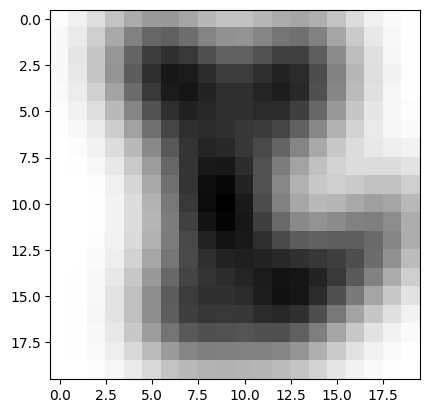

<Figure size 500x500 with 0 Axes>

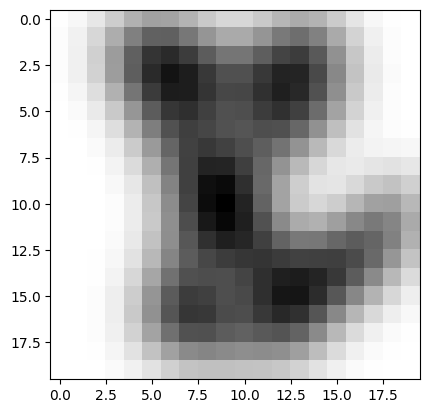

<Figure size 500x500 with 0 Axes>

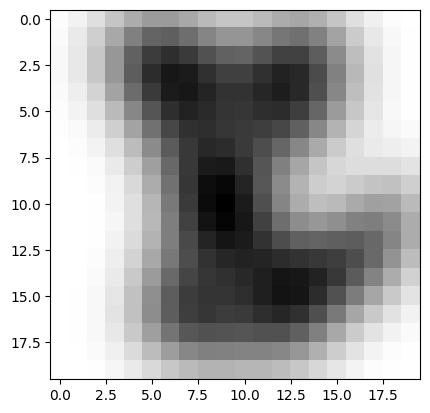

<Figure size 500x500 with 0 Axes>

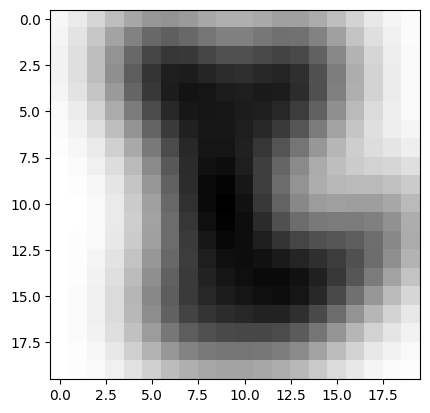

<Figure size 500x500 with 0 Axes>

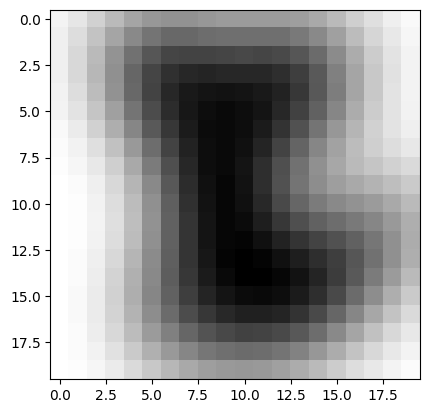

<Figure size 500x500 with 0 Axes>

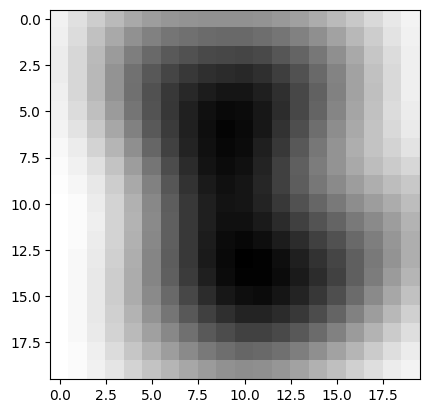

<Figure size 500x500 with 0 Axes>

Octave 2


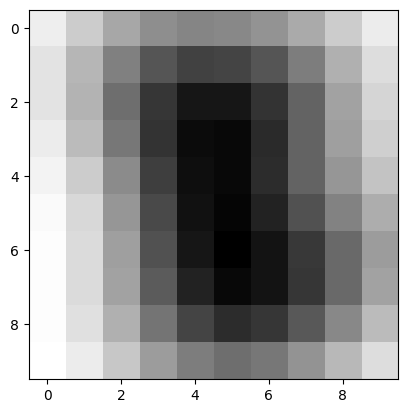

<Figure size 500x500 with 0 Axes>

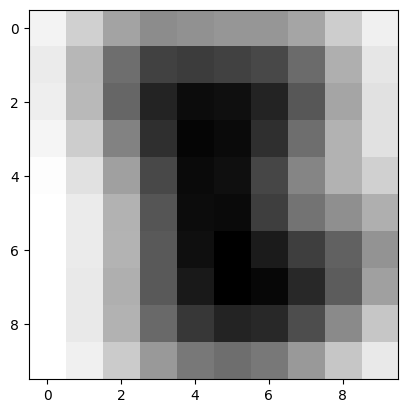

<Figure size 500x500 with 0 Axes>

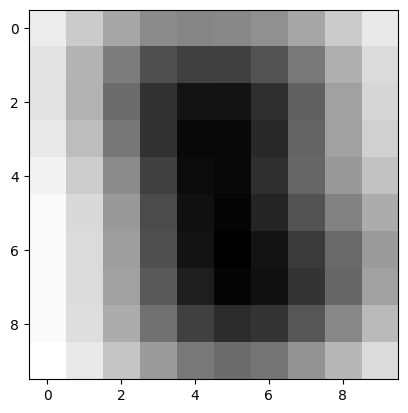

<Figure size 500x500 with 0 Axes>

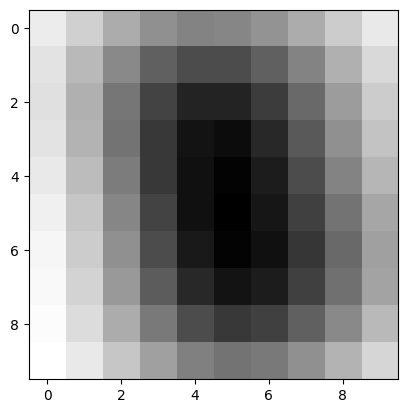

<Figure size 500x500 with 0 Axes>

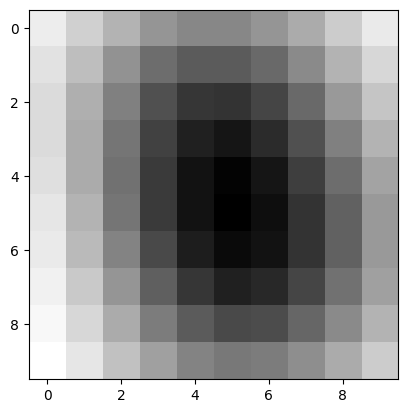

<Figure size 500x500 with 0 Axes>

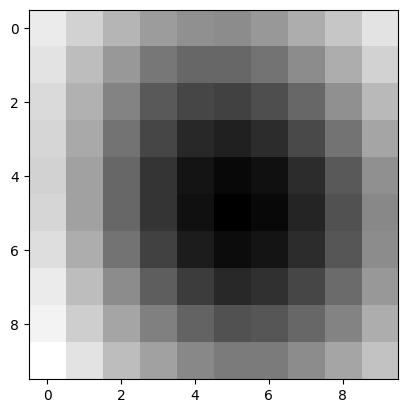

<Figure size 500x500 with 0 Axes>

Octave 3


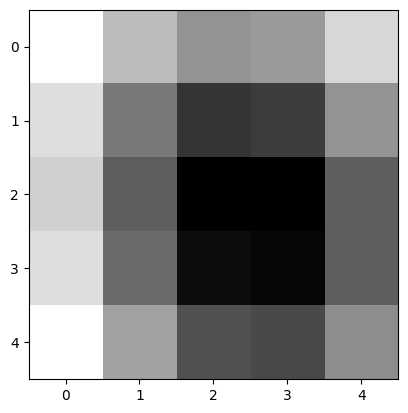

<Figure size 500x500 with 0 Axes>

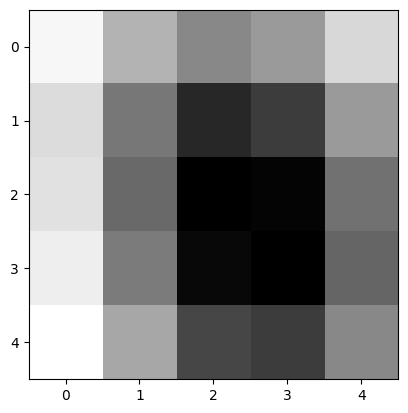

<Figure size 500x500 with 0 Axes>

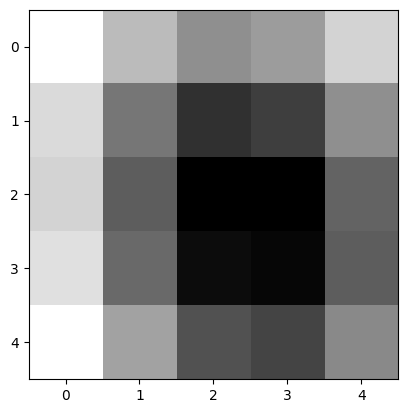

<Figure size 500x500 with 0 Axes>

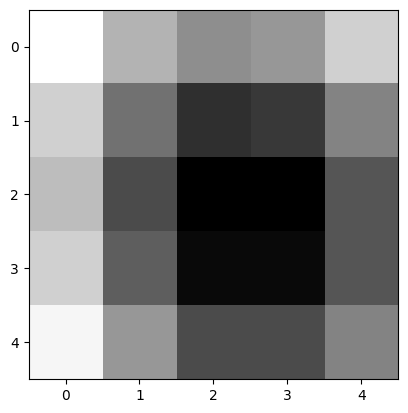

<Figure size 500x500 with 0 Axes>

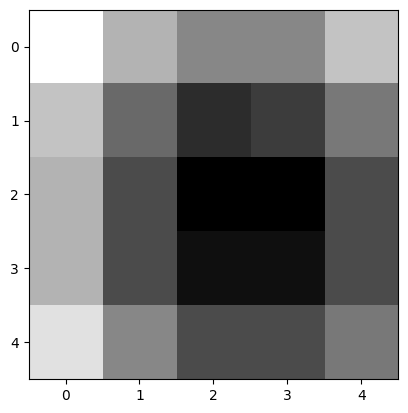

<Figure size 500x500 with 0 Axes>

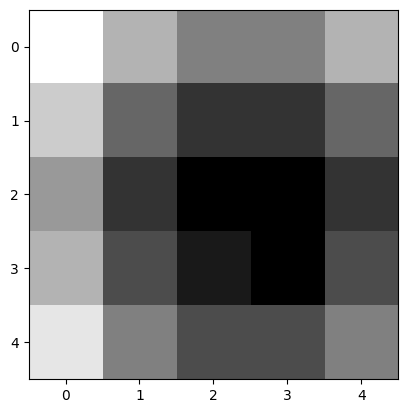

<Figure size 500x500 with 0 Axes>

In [46]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in gaussian_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [47]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for i in range(len(gaussian_images[octave])):
        gaussian_images[octave][i] = enc(gaussian_images[octave][i])

Octave 1
Octave 2
Octave 3


In [48]:
dog_images = [[cv2.imread(f'dog-{IMG_NAME}-{oct}-{i}.png', 0) for i in range(5)] for oct in range(num_octaves) ]

Octave 1


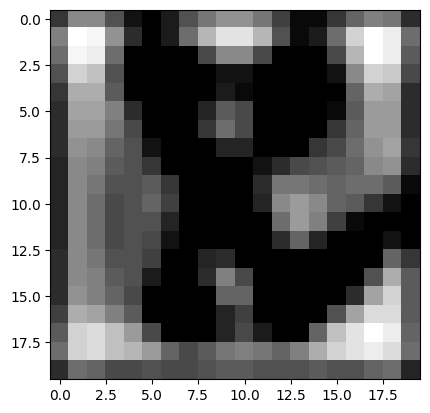

<Figure size 500x500 with 0 Axes>

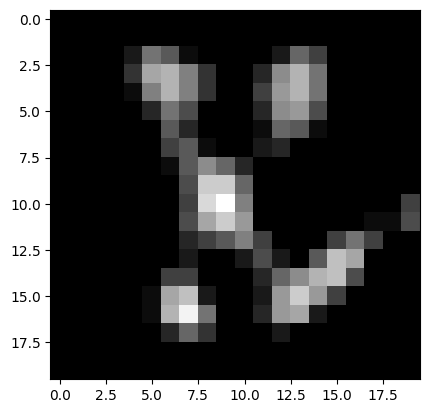

<Figure size 500x500 with 0 Axes>

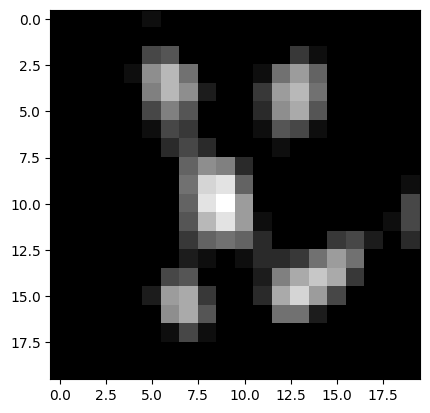

<Figure size 500x500 with 0 Axes>

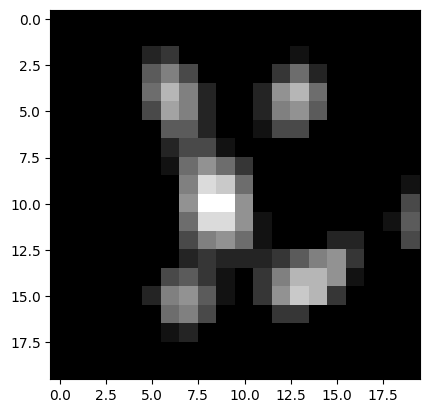

<Figure size 500x500 with 0 Axes>

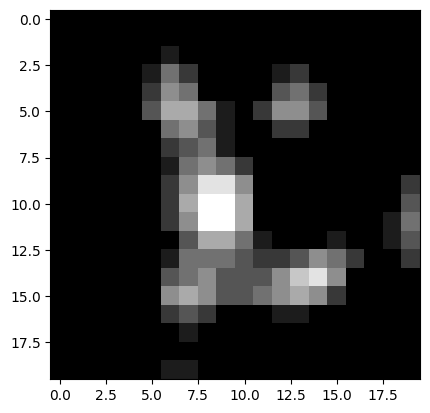

<Figure size 500x500 with 0 Axes>

Octave 2


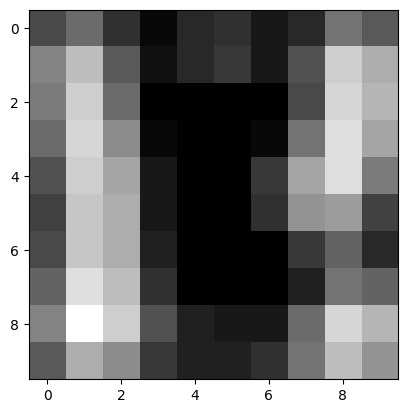

<Figure size 500x500 with 0 Axes>

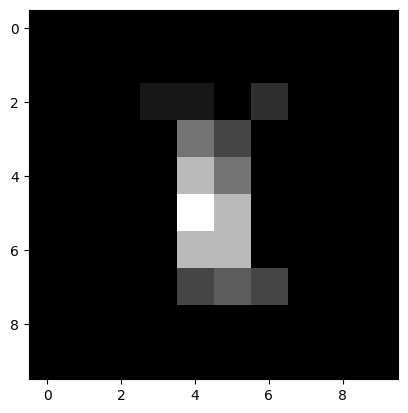

<Figure size 500x500 with 0 Axes>

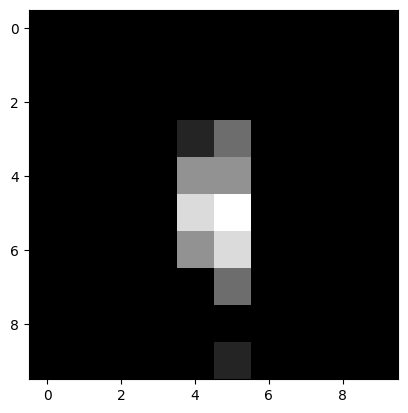

<Figure size 500x500 with 0 Axes>

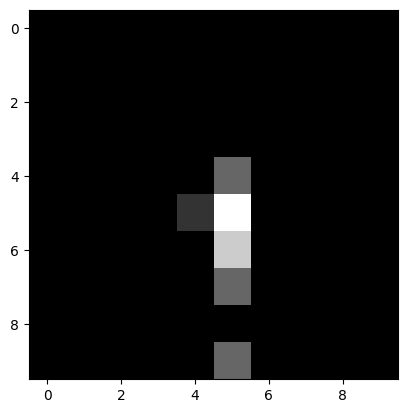

<Figure size 500x500 with 0 Axes>

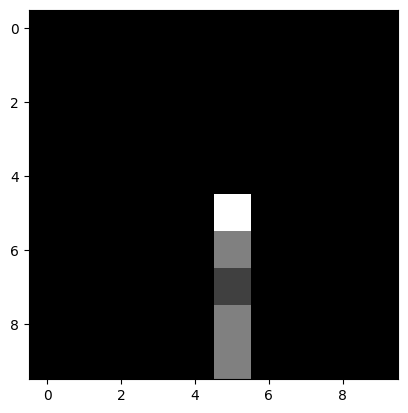

<Figure size 500x500 with 0 Axes>

Octave 3


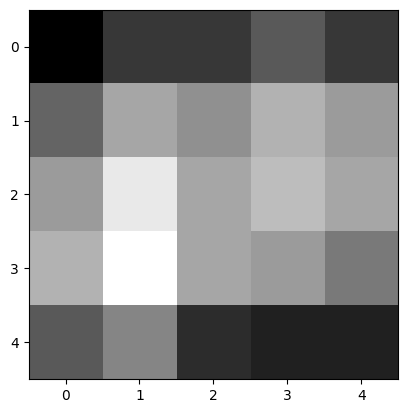

<Figure size 500x500 with 0 Axes>

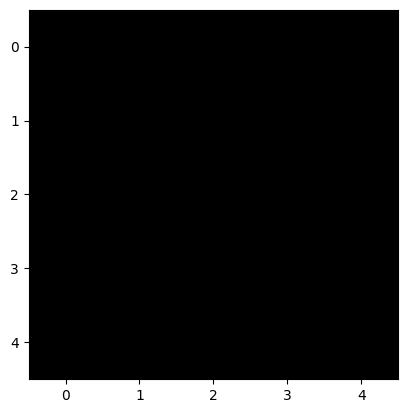

<Figure size 500x500 with 0 Axes>

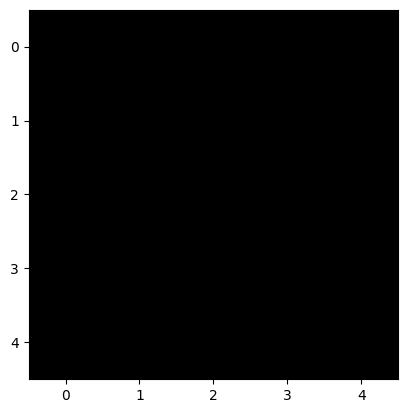

<Figure size 500x500 with 0 Axes>

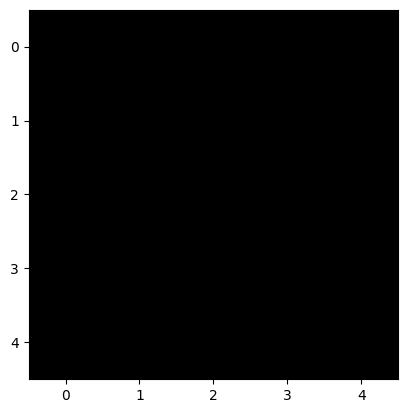

<Figure size 500x500 with 0 Axes>

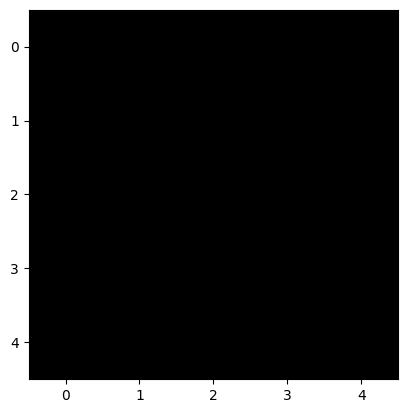

<Figure size 500x500 with 0 Axes>

In [49]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in dog_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [50]:
def cmp(x, a, b):
    if isinstance(x, ts.CKKSVector):
        x = x.decrypt(secret_key)[0]
    if isinstance(a, ts.CKKSVector):
        a = a.decrypt(secret_key)[0]
    if isinstance(b, ts.CKKSVector):
        b = b.decrypt(secret_key)[0]
    return ts.ckks_vector(context=context, vector=[int(a < x < b)])
    

In [51]:
sigma=1.6
num_intervals=3
assumed_blur=0.5
image_border_width=5

In [52]:
for octave in range(num_octaves):
    for i in range(len(dog_images[octave])):
        dog_images[octave][i] = enc(dog_images[octave][i])

In [53]:
def refresh(value):
    # print("Value: ", value)
    decrypted_value = value.decrypt(secret_key)[0]
    return ts.ckks_vector(context=context, vector=[decrypted_value])

In [54]:
keypoints, flat_list = secFindScaleSpaceExtrema(gaussian_images, dog_images, num_intervals, sigma, image_border_width, cmp=cmp, refresh=np.vectorize(refresh))

i, j:  5 5
Num attempts:  1
i, j:  5 6
Num attempts:  1
i, j:  5 7
Num attempts:  1
i, j:  5 8
Num attempts:  1
i, j:  5 9
Num attempts:  1
i, j:  5 10
Num attempts:  1
i, j:  5 11
Num attempts:  1
i, j:  5 12
Num attempts:  1
i, j:  5 13
Num attempts:  1
i, j:  5 14
Num attempts:  1
i, j:  6 5
Num attempts:  1
i, j:  6 6
Num attempts:  1
i, j:  6 7
Num attempts:  1
i, j:  6 8
Num attempts:  1
i, j:  6 9
Num attempts:  1
i, j:  6 10
Num attempts:  1
i, j:  6 11
Num attempts:  1
i, j:  6 12
Num attempts:  1
i, j:  6 13
Num attempts:  1
i, j:  6 14
Num attempts:  1
i, j:  7 5
Num attempts:  1
i, j:  7 6
Num attempts:  1
i, j:  7 7
Num attempts:  1
i, j:  7 8
Num attempts:  1
i, j:  7 9
Num attempts:  1
i, j:  7 10
Num attempts:  1
i, j:  7 11
Num attempts:  1
i, j:  7 12
Num attempts:  1
i, j:  7 13
Num attempts:  1
i, j:  7 14
Num attempts:  1
i, j:  8 5
Num attempts:  1
i, j:  8 6
Num attempts:  1
i, j:  8 7
Num attempts:  1
i, j:  8 8
Num attempts:  1
i, j:  8 9
Num attempts:  1
i, j:

In [55]:
len(keypoints[0][0])

10

In [56]:
def iterimg(imgs):
    for octave in range(num_octaves):
        for i in range(len(imgs[octave])):
            yield np.array(imgs[octave][i])

(20, 20, 1) uint8


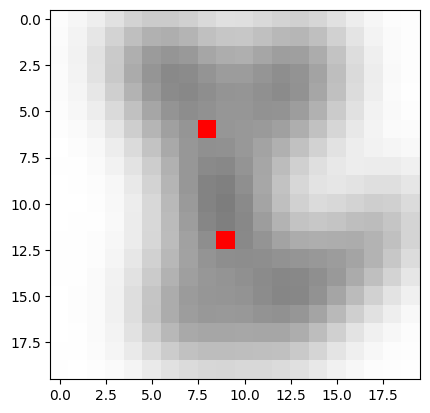

<Figure size 1000x1000 with 0 Axes>

(20, 20, 1) uint8


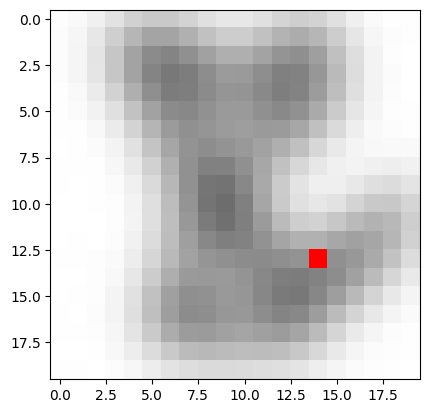

<Figure size 1000x1000 with 0 Axes>

(20, 20, 1) uint8


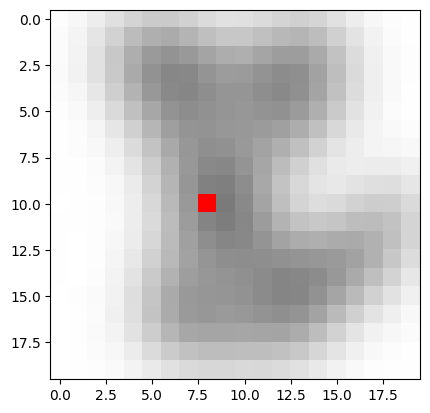

<Figure size 1000x1000 with 0 Axes>

(20, 20, 1) uint8


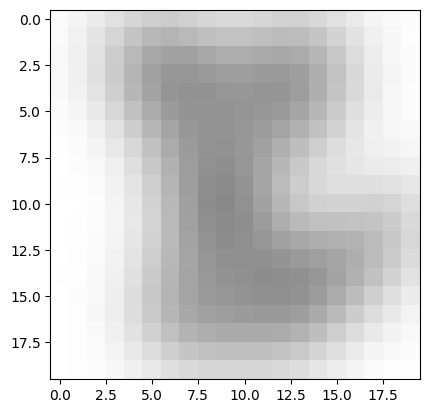

<Figure size 1000x1000 with 0 Axes>

(20, 20, 1) uint8


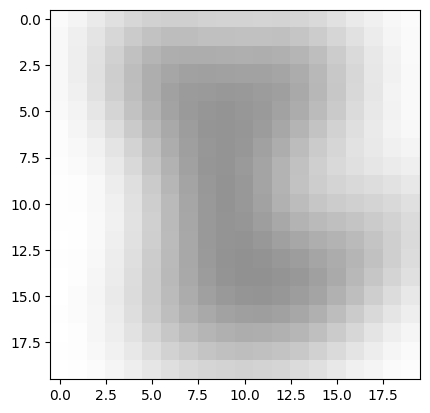

<Figure size 1000x1000 with 0 Axes>

(20, 20, 1) uint8


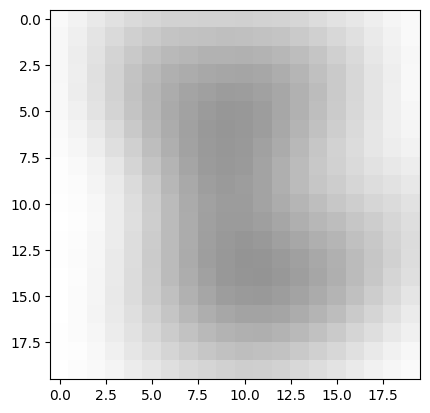

<Figure size 1000x1000 with 0 Axes>

(10, 10, 1) uint8


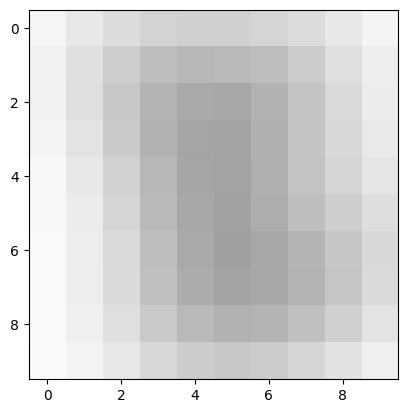

<Figure size 1000x1000 with 0 Axes>

(10, 10, 1) uint8


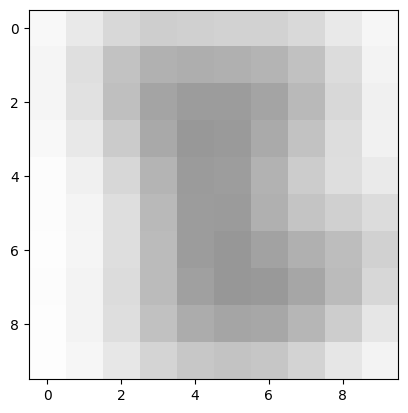

<Figure size 1000x1000 with 0 Axes>

(10, 10, 1) uint8


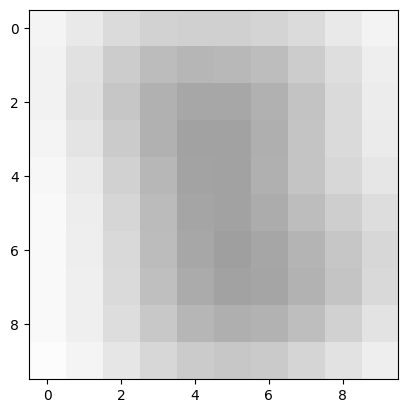

<Figure size 1000x1000 with 0 Axes>

In [59]:
count = 0
for kp, img in zip(iterimg(keypoints), iterimg(gaussian_images)):
    # print(kp.shape, (img).shape)
    dec_img = dec(img)
    dec_img = np.array(dec_img, dtype=np.uint8)
    # dec_img = dec_img.squeeze()  
    print(dec_img.shape, dec_img.dtype)
    # Convert image to color image
    dec_img = cv2.cvtColor(dec_img, cv2.COLOR_GRAY2RGB)
    for k in kp.flatten():
        # Set the pixel value to red if it is a keypoint
        dec_img[int(k.i), int(k.j)] = [255, 0, 0] if k.is_keypoint_present.decrypt(secret_key)[0] > 0.5 else dec_img[int(k.i), int(k.j)]
    plot_image(dec_img)

    # Save the image
    cv2.imwrite(f'{IMG_NAME}-keypoints-{count}.png', dec_img)
    count += 1
